In [38]:
import pandas as pd

In [39]:
df = pd.read_excel('./DH(임베딩컬럼만).xlsx', index_col=0)

In [134]:
df.head()

,predict_date,dh_embedding,oil_embedding,target,dh_embedding_1,dh_embedding_2
0,2022-01-02,"[-0.14264455437660217, 0.05831192433834076, 0....","[-0.3298284411430359, -0.40550950169563293, 0....",0,"[-0.14264455437660217, 0.05831192433834076, 0....","[-0.3298284411430359, -0.40550950169563293, 0...."
1,2022-01-03,"[-0.15551824867725372, -0.03494337573647499, 0...","[-0.14796359837055206, -0.4272714853286743, 0....",0,"[-0.15551824867725372, -0.03494337573647499, 0...","[-0.14796359837055206, -0.4272714853286743, 0...."
2,2022-01-04,"[-0.6354258060455322, -0.365503191947937, 0.98...","[-0.16407831013202667, 0.3745501935482025, 0.2...",0,"[-0.6354258060455322, -0.365503191947937, 0.98...","[-0.16407831013202667, 0.3745501935482025, 0.2..."
3,2022-01-05,"[1.2611210346221924, -1.2480064630508423, 0.56...","[0.57369065284729, 0.3639283776283264, 0.44556...",0,"[1.2611210346221924, -1.2480064630508423, 0.56...","[0.57369065284729, 0.3639283776283264, 0.44556..."
4,2022-01-06,"[-1.170987844467163, -0.04770953953266144, 0.0...","[-0.3165379762649536, 0.6350396871566772, 0.40...",0,"[-1.170987844467163, -0.04770953953266144, 0.0...","[-0.3165379762649536, 0.6350396871566772, 0.40..."


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   predict_date   484 non-null    object
 1   dh_embedding   484 non-null    object
 2   oil_embedding  484 non-null    object
 3   target         484 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


In [60]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D, GlobalMaxPooling1D , Input
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [43]:
dh_embedding = []
oil_embedding = []
for i in df['dh_embedding']:
    dh_embedding.append(eval(i))
    # print(eval(i))
for i in df['oil_embedding']:
    oil_embedding.append(eval(i))
df['dh_embedding_1']= dh_embedding
df['dh_embedding_2']= oil_embedding

In [116]:
df['dh_embedding_1']

0      [-0.14264455437660217, 0.05831192433834076, 0....
1      [-0.15551824867725372, -0.03494337573647499, 0...
2      [-0.6354258060455322, -0.365503191947937, 0.98...
3      [1.2611210346221924, -1.2480064630508423, 0.56...
4      [-1.170987844467163, -0.04770953953266144, 0.0...
                             ...                        
479    [-0.8856520056724548, 0.06582590192556381, 0.2...
480    [-0.7657447457313538, 1.1281311511993408, -2.1...
481    [-0.12134005129337311, -0.26261863112449646, 1...
482    [0.152285635471344, -0.14103375375270844, 0.35...
483    [-0.13556396961212158, 0.7741327285766602, 0.7...
Name: dh_embedding_1, Length: 484, dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 0 to 483
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   predict_date    484 non-null    object
 1   dh_embedding    484 non-null    object
 2   oil_embedding   484 non-null    object
 3   target          484 non-null    int64 
 4   dh_embedding_1  484 non-null    object
 5   dh_embedding_2  484 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.5+ KB


In [45]:
df_result = pd.DataFrame()
for i in range(len(df)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)
    
    df_result= pd.concat([df_result, pd.DataFrame(list(df['dh_embedding_1'])[i]).T], ignore_index = True)
    

In [46]:
df_result

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.142645,0.058312,0.502249,-0.395464,0.771435,0.228411,0.204277,1.168756,-0.467592,0.532602,...,2.260043,0.291681,0.939041,1.198350,-1.234513,-0.150275,-0.594508,-0.730109,1.301838,0.986439
1,-0.155518,-0.034943,0.687456,-0.375169,0.865305,1.222545,0.709885,1.500067,-0.622607,-0.418989,...,1.089634,0.547094,1.118910,0.274835,-1.004895,0.415038,-0.704613,-0.159059,0.678813,0.640120
2,-0.635426,-0.365503,0.980052,-1.194645,0.973225,-0.346883,1.668483,0.297069,-0.350540,0.624635,...,1.335577,-0.402616,0.515464,-0.167068,-0.806888,-0.482472,-0.440040,-0.389443,-0.728657,0.464612
3,1.261121,-1.248006,0.568895,-0.861560,0.287205,0.114459,0.611415,-1.042778,-0.210525,-0.118655,...,0.566496,1.365747,0.323337,-0.906803,-2.814091,-1.201030,-0.486176,0.991447,0.299686,0.616848
4,-1.170988,-0.047710,0.071303,-1.752271,1.311886,-0.679386,1.477055,0.875036,-0.596980,-0.380094,...,0.582101,-0.099644,1.437210,-0.360357,-0.239067,-0.242944,-0.570409,-0.318060,0.072375,0.683568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-0.885652,0.065826,0.236787,-0.912471,0.724703,-1.100561,0.984007,2.174856,-0.921371,0.367693,...,1.437214,0.367731,0.453068,-0.202274,-0.392434,0.023001,0.453143,0.947777,0.550589,-0.501481
480,-0.765745,1.128131,-2.101217,-0.525943,0.398868,0.032515,0.605137,0.121631,-1.375852,1.717429,...,1.574709,0.098423,-0.062640,-0.582449,-1.007566,-1.189145,-0.121193,0.146802,1.193322,0.016205
481,-0.121340,-0.262619,1.023851,-0.836520,-0.082518,-1.132213,1.289689,0.779423,0.154237,1.179057,...,1.617075,0.001534,-0.166116,-1.584017,-1.998227,-0.240193,-0.267531,0.210852,-0.476874,1.060944
482,0.152286,-0.141034,0.351553,-1.355199,-0.291024,-0.129728,0.986744,1.414943,-0.714244,-0.449911,...,0.960871,-0.495753,1.586923,0.144836,-0.807374,-1.080836,-0.386331,-0.454861,0.129780,1.640183


In [47]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
479    0
480    1
481    1
482    1
483    0
Name: target, Length: 484, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_result, df['target'], test_size = 0.2, random_state = 1, stratify = df['target'])

In [49]:
X_train.shape

(387, 768)

In [50]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [51]:
import tensorflow as tf

In [52]:
x_train_ex = tf.expand_dims(X_train, axis=2)
x_test_ex = tf.expand_dims(X_test, axis=2)

print('원본 차원 정보 :',X_train.shape) #=> 원본 차원 정보 : (3998, 140)
print('변경된 차원 정보 :',x_train_ex.shape) #=> 변경된 차원 정보 : (3998, 140, 1)

# (3998, 140, 1)는 각각 아래의 의미를 가진다.
# (데이터 개수, Sequence 길이, Input Vector 길이)

원본 차원 정보 : (387, 768)
변경된 차원 정보 : (387, 768, 1)


In [53]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.LSTM(100, return_sequences=True, input_shape=(x_train_ex.shape[1], x_train_ex.shape[2])),
    layers.Dropout(0.25),
    layers.Bidirectional(layers.LSTM(100)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [54]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [55]:
training_record = model.fit(x_train_ex, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_train_ex, y_train),
                    shuffle=True)

Epoch 1/30


4/4 [==============================] - 98s 23s/step - loss: 0.6905 - val_loss: 0.6826
Epoch 2/30
4/4 [==============================] - 117s 27s/step - loss: 0.6801 - val_loss: 0.6814
Epoch 3/30
4/4 [==============================] - 107s 25s/step - loss: 0.6865 - val_loss: 0.6823
Epoch 4/30
4/4 [==============================] - 115s 26s/step - loss: 0.6814 - val_loss: 0.6791
Epoch 5/30
4/4 [==============================] - 129s 29s/step - loss: 0.6801 - val_loss: 0.6793
Epoch 6/30
4/4 [==============================] - 134s 31s/step - loss: 0.6800 - val_loss: 0.6803
Epoch 7/30
4/4 [==============================] - 134s 31s/step - loss: 0.6802 - val_loss: 0.6796
Epoch 8/30
4/4 [==============================] - 130s 29s/step - loss: 0.6800 - val_loss: 0.6797
Epoch 9/30
4/4 [==============================] - 71s 17s/step - loss: 0.6809 - val_loss: 0.6807
Epoch 10/30
4/4 [==============================] - 76s 18s/step - loss: 0.6803 - val_loss: 0.6808
Epoch 11/30
4/4 [================

In [56]:
pred_proba = model.predict(x_test_ex)

4/4 [==============================] - 2s 370ms/step


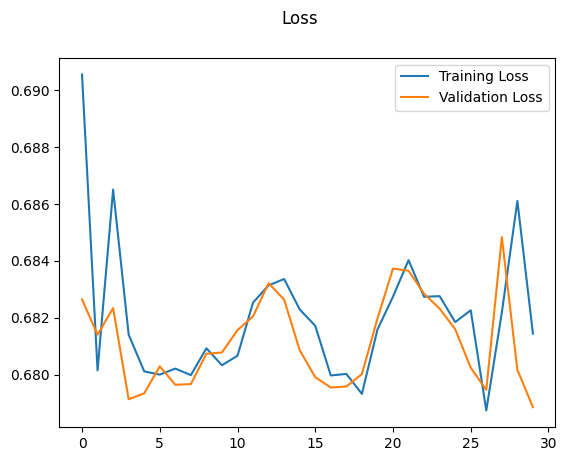

In [57]:
fig, ax = plt.subplots()
plt.plot(training_record.history["loss"], label="Training Loss")
plt.plot(training_record.history["val_loss"], label="Validation Loss")
plt.legend()
fig.suptitle("Loss")
plt.show()

In [93]:
# 2차원인 pred_proba를 1차원으로 변경해준다 (1000,1)=>(1000)
pred_proba_1d = pred_proba.reshape(-1)

# 임계치 이상이면 True 미만이면 False를 부여한다.
threshold = 0.449
pred = (pred_proba_1d >= threshold)

In [94]:
# Compute the metrics
accuracy_test_rnn= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test_rnn}')
#=> Accuracy: 0.988

precision_test_rnn=precision_score(y_test, pred)
print(f'Precision = {round(precision_test_rnn,3)}')
#=> Precision = 0.99

recall_test_rnn=recall_score(y_test, pred)
print(f'Recall = {round(recall_test_rnn,3)}')
#=> Recall = 0.99

f1_test_rnn=f1_score(y_test, pred)
print(f'f1 score = {round(f1_test_rnn,3)}')

Accuracy: 0.5670103092783505
Precision = 0.444
Recall = 0.098
f1 score = 0.16


In [95]:
pred

array([False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [118]:
# 모델을 저장하는 코드
model.save('pretrained_model.h5')

In [119]:
df_result = pd.DataFrame()
for i in range(len(df)):
#     print(pd.DataFrame(list(X_train['dh_embedding_1'])[i]).T)
    
    df_result= pd.concat([df_result, pd.DataFrame(list(df['dh_embedding_2'])[i]).T], ignore_index = True)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df_result, df['target'], test_size = 0.2, random_state = 1, stratify = df['target'])

In [121]:
x_train_ex = tf.expand_dims(X_train, axis=2)
x_test_ex = tf.expand_dims(X_test, axis=2)

print('원본 차원 정보 :',X_train.shape) #=> 원본 차원 정보 : (3998, 140)
print('변경된 차원 정보 :',x_train_ex.shape) #=> 변경된 차원 정보 : (3998, 140, 1)

# (3998, 140, 1)는 각각 아래의 의미를 가진다.
# (데이터 개수, Sequence 길이, Input Vector 길이)

원본 차원 정보 : (387, 768)
변경된 차원 정보 : (387, 768, 1)


In [127]:
# 1. 기존에 학습한 모델 불러오기
from tensorflow.keras.models import load_model

pretrained_model = load_model('./pretrained_model.h5',compile=False,encoded_path='euc-kr')
# pretrained_model = load_model('./pretrained_model.h5')
# pretrained_model = load_model('pretrained_model.h5', compile=False, encoding='euc-kr')
# file_path = r'pretrained_model.h5'
# pretrained_model = load_model(file_path)
# file_path = r'./pretrained_model.h5'
# decoded_path = file_path.encode('cp949').decode('cp949')
# pretrained_model = load_model(decoded_path)

# import os

# file_path = 'pretrained_model.h5'
# if os.path.exists(file_path):
#     pretrained_model = load_model(file_path)
# else:
#     print("파일을 찾을 수 없습니다. 경로를 다시 확인해주세요.")


# 2. 모델의 일부 층 동결
for layer in pretrained_model.layers:
    layer.trainable = False

# 3. 새로운 출력층 추가
output_layer = layers.Dense(1, activation='sigmoid')(pretrained_model.layers[-2].output)

# 4. 전체 모델 구성
transfer_model = tf.keras.Model(inputs=pretrained_model.input, outputs=output_layer)

# 5. 모델 컴파일
transfer_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# 6. 전이 학습 진행
transfer_model.fit(x_train_ex, y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(x_train_ex, y_train),
                   shuffle=True)

TypeError: load_model() got an unexpected keyword argument 'encoded_path'